In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib
import sklearn.linear_model as skl_lm
import io
import matplotlib.pyplot as plt

In [160]:
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv(io.BytesIO(uploaded['foursemester.csv']))

Saving foursemester.csv to foursemester (1).csv


Preprocessing

In [161]:
def terms(term):
    if(term<=9):
        return(1)
    elif(term>9):
        return(2)

dataset["terms_level"]=dataset["terms"].apply(terms)

In [162]:
dataset

id  1_term  ...  mashruti_motevali  terms_level
0    90168001    3901  ...                  1            2
1    90168002    3901  ...                  0            2
2    90168003    3901  ...                  2            2
3    90168004    3901  ...                  1            2
4    90168006    3901  ...                  1            1
..        ...     ...  ...                ...          ...
541  96243093    3961  ...                  0            1
542  96243094    3961  ...                  0            1
543  96243095    3961  ...                  2            1
544  96243097    3961  ...                  0            1
545  96243099    3961  ...                  0            1

[546 rows x 52 columns]

In [163]:
dataset.isnull().sum()

id                        0
1_term                    0
1_obtained_units          0
1_total_obtained_units    0
1_passed_units            0
1_total_passed_units      0
1_deleted_units           0
1_failed_units            0
1_gpa                     0
1_cgpa                    0
1_mashruti                0
2_term                    0
2_obtained_units          0
2_total_obtained_units    0
2_passed_units            0
2_total_passed_units      0
2_deleted_units           0
2_failed_units            0
2_gpa                     0
2_cgpa                    0
2_mashruti                0
3_term                    0
3_obtained_units          0
3_total_obtained_units    0
3_passed_units            0
3_total_passed_units      0
3_deleted_units           0
3_failed_units            0
3_gpa                     0
3_cgpa                    0
3_mashruti                0
4_term                    0
4_obtained_units          0
4_total_obtained_units    0
4_passed_units            0
4_total_passed_units

In [164]:
print("Data : {}\n".format(dataset.shape))
print("Data colums :\n\n {}".format(dataset.columns))
dataset.head()

Data : (546, 52)

Data colums :

 Index(['id', '1_term', '1_obtained_units', '1_total_obtained_units',
       '1_passed_units', '1_total_passed_units', '1_deleted_units',
       '1_failed_units', '1_gpa', '1_cgpa', '1_mashruti', '2_term',
       '2_obtained_units', '2_total_obtained_units', '2_passed_units',
       '2_total_passed_units', '2_deleted_units', '2_failed_units', '2_gpa',
       '2_cgpa', '2_mashruti', '3_term', '3_obtained_units',
       '3_total_obtained_units', '3_passed_units', '3_total_passed_units',
       '3_deleted_units', '3_failed_units', '3_gpa', '3_cgpa', '3_mashruti',
       '4_term', '4_obtained_units', '4_total_obtained_units',
       '4_passed_units', '4_total_passed_units', '4_deleted_units',
       '4_failed_units', '4_gpa', '4_cgpa', '4_mashruti', 'gender',
       'residence', 'birthdate', 'entering', 'entering_type', 'mashruti',
       'terms', 'final_gpa', 'final_mashruti', 'mashruti_motevali',
       'terms_level'],
      dtype='object')


id  1_term  ...  mashruti_motevali  terms_level
0  90168001    3901  ...                  1            2
1  90168002    3901  ...                  0            2
2  90168003    3901  ...                  2            2
3  90168004    3901  ...                  1            2
4  90168006    3901  ...                  1            1

[5 rows x 52 columns]

Number of students per term


1    324
2    222
Name: terms_level, dtype: int64

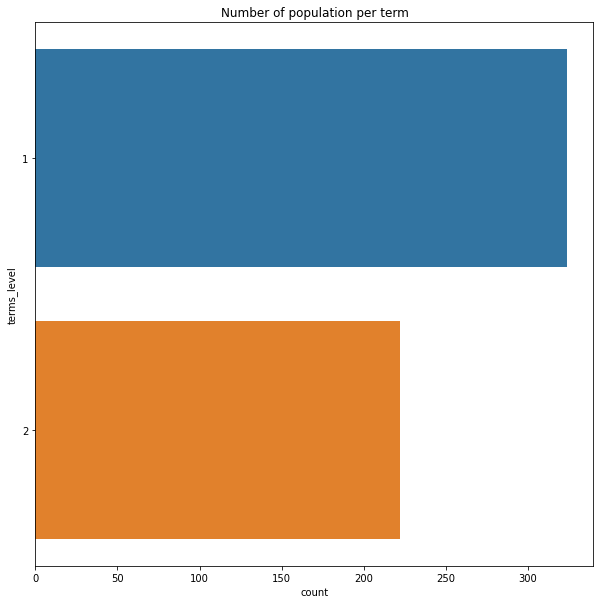

In [165]:
print('Number of students per term')
display(dataset['terms_level'].value_counts())
fig=plt.figure(figsize=(10, 10))
a = sns.countplot(y = dataset['terms_level'],order = dataset['terms_level'].value_counts().index, data = dataset).set_title('Number of population per term')

Text(0.5, 1.0, 'Correlation Heatmap')

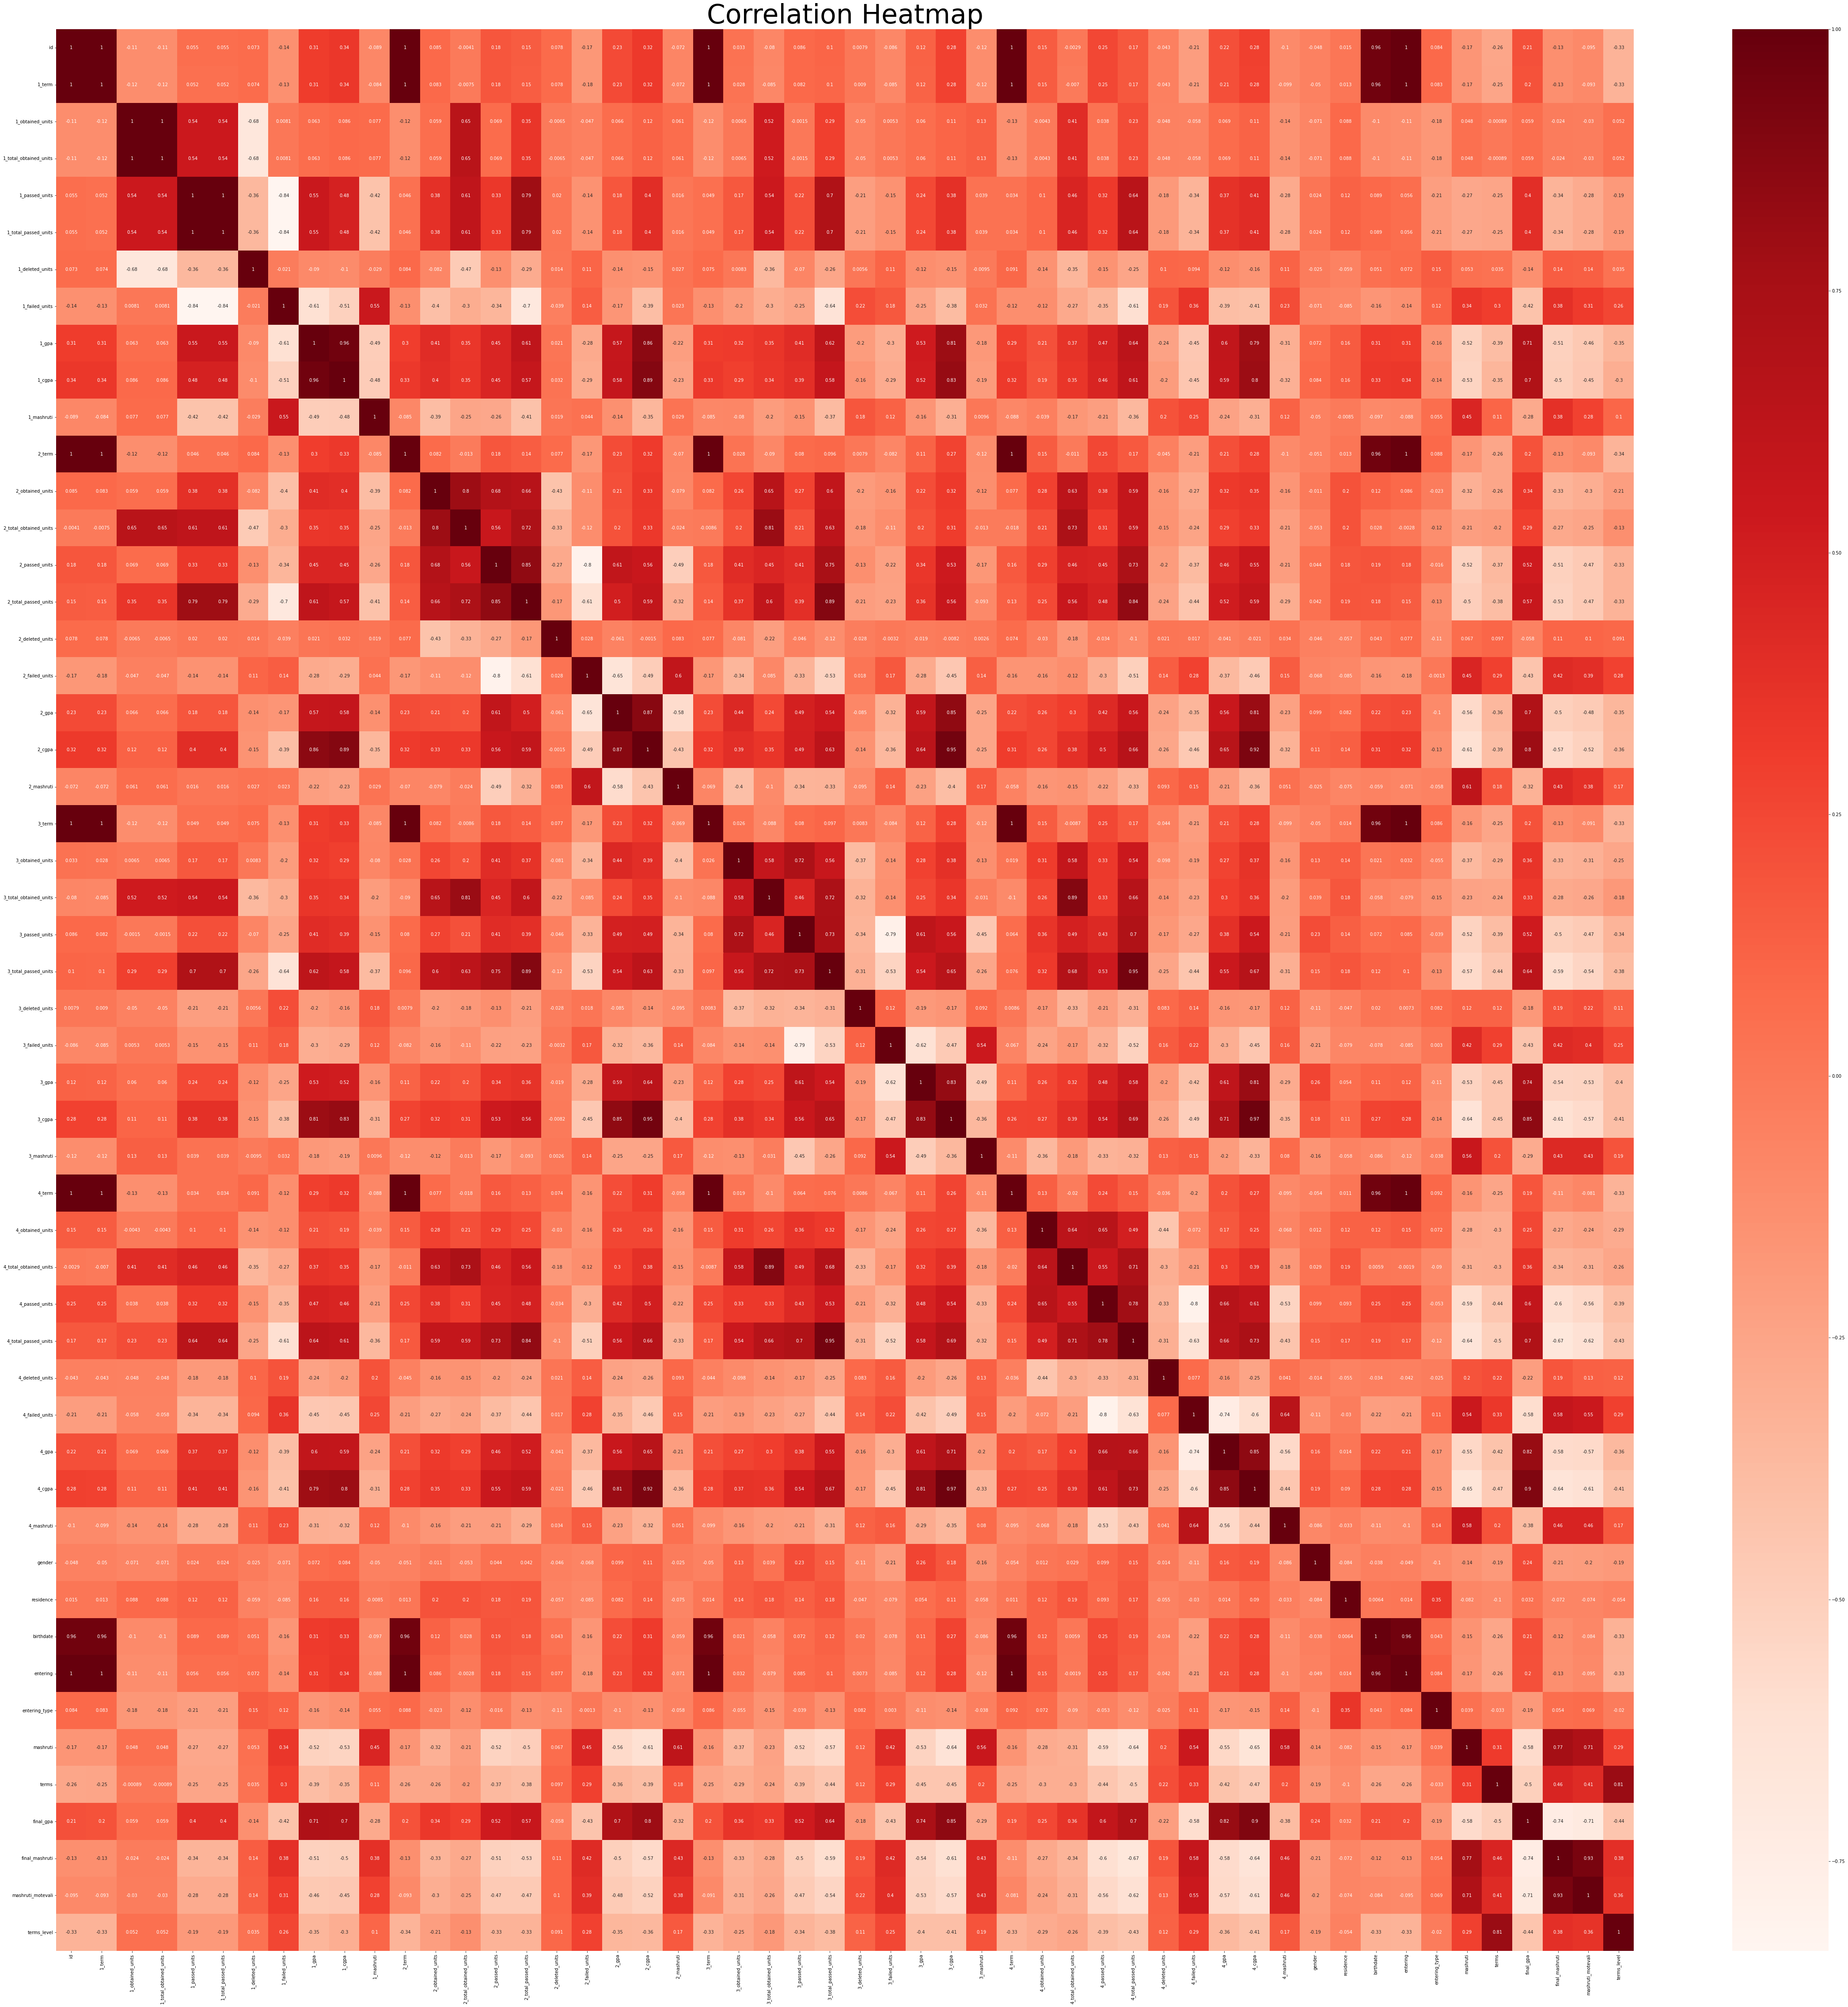

In [166]:
corr=dataset.corr()
plt.figure(figsize=(80,80))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=60)

In [167]:
X=dataset[['1_obtained_units', '1_total_obtained_units',
       '1_passed_units', '1_total_passed_units', '1_deleted_units',
       '1_failed_units', '1_gpa', '1_cgpa', '1_mashruti',
       '2_obtained_units', '2_total_obtained_units', '2_passed_units',
       '2_total_passed_units', '2_deleted_units', '2_failed_units', '2_gpa',
       '2_cgpa', '2_mashruti', '3_obtained_units',
       '3_total_obtained_units', '3_passed_units', '3_total_passed_units',
       '3_deleted_units', '3_failed_units', '3_gpa', '3_cgpa', '3_mashruti', '4_obtained_units', '4_total_obtained_units',
       '4_passed_units', '4_total_passed_units', '4_deleted_units',
       '4_failed_units', '4_gpa', '4_cgpa', '4_mashruti', 'gender', 'residence',
       'birthdate', 'entering', 'mashruti']]
Y=dataset['terms_level']

In [168]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X))
print(scaler.data_max_)
x=scaler.transform(X)

MinMaxScaler()
[2.000e+01 2.000e+01 2.000e+01 2.000e+01 1.500e+01 1.300e+01 2.000e+01
 2.000e+01 1.000e+00 2.200e+01 4.000e+01 2.200e+01 4.000e+01 6.000e+00
 1.500e+01 1.976e+01 1.988e+01 1.000e+00 2.200e+01 5.800e+01 2.200e+01
 5.800e+01 9.000e+00 1.500e+01 1.991e+01 1.989e+01 1.000e+00 2.000e+01
 8.500e+01 2.000e+01 7.600e+01 1.100e+01 1.700e+01 1.990e+01 1.989e+01
 1.000e+00 1.000e+00 1.000e+00 1.379e+03 9.600e+01 3.000e+00]


LogisticRegression

In [169]:
from sklearn.linear_model import LogisticRegressionCV
logisticClassifier = LogisticRegressionCV(cv=10,multi_class='multinomial', random_state=0).fit(x, Y)
logisticClassifier.score(x,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7728937728937729

In [170]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 0, shuffle = True)

In [171]:
from sklearn.linear_model import LogisticRegression

clf_logistic = LogisticRegression(random_state=0).fit(x_train,y_train)
y_pred = clf_logistic.predict(x_test) 
print(classification_report(y_test,y_pred))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

              precision    recall  f1-score   support

           1       0.77      0.97      0.86        59
           2       0.94      0.67      0.78        51

    accuracy                           0.83       110
   macro avg       0.86      0.82      0.82       110
weighted avg       0.85      0.83      0.82       110

     Actual  Predicted
85        2          2
436       2          1
96        2          2
186       1          1
134       1          1
..      ...        ...
483       1          1
245       2          2
76        2          2
229       2          2
312       1          1

[110 rows x 2 columns]


SVM

In [172]:
X=dataset[['1_obtained_units', '1_total_obtained_units',
       '1_passed_units', '1_total_passed_units', '1_deleted_units',
       '1_failed_units', '1_gpa', '1_cgpa', '1_mashruti',
       '2_obtained_units', '2_total_obtained_units', '2_passed_units',
       '2_total_passed_units', '2_deleted_units', '2_failed_units', '2_gpa',
       '2_cgpa', '2_mashruti', '3_obtained_units',
       '3_total_obtained_units', '3_passed_units', '3_total_passed_units',
       '3_deleted_units', '3_failed_units', '3_gpa', '3_cgpa', '3_mashruti', '4_obtained_units', '4_total_obtained_units',
       '4_passed_units', '4_total_passed_units', '4_deleted_units',
       '4_failed_units', '4_gpa', '4_cgpa', '4_mashruti', 'gender', 'residence',
       'birthdate', 'entering', 'mashruti']]
Y=dataset['terms_level']

In [173]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X))
print(scaler.data_max_)
x=scaler.transform(X)

MinMaxScaler()
[2.000e+01 2.000e+01 2.000e+01 2.000e+01 1.500e+01 1.300e+01 2.000e+01
 2.000e+01 1.000e+00 2.200e+01 4.000e+01 2.200e+01 4.000e+01 6.000e+00
 1.500e+01 1.976e+01 1.988e+01 1.000e+00 2.200e+01 5.800e+01 2.200e+01
 5.800e+01 9.000e+00 1.500e+01 1.991e+01 1.989e+01 1.000e+00 2.000e+01
 8.500e+01 2.000e+01 7.600e+01 1.100e+01 1.700e+01 1.990e+01 1.989e+01
 1.000e+00 1.000e+00 1.000e+00 1.379e+03 9.600e+01 3.000e+00]


In [174]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.svm import SVC

cv=RepeatedKFold(n_splits=10,random_state=0)
svmClassifier=SVC(kernel='linear')
scores=cross_val_score(svmClassifier,x,Y,scoring='accuracy',cv=cv)
print(mean(scores))

0.7542154882154881


In [175]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 0, shuffle = True)

In [176]:
svmClassifier.fit(x_train,y_train)
y_pred = svmClassifier.predict(x_test)
print(classification_report(y_test,y_pred))
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df1)
plt.show()

              precision    recall  f1-score   support

           1       0.78      0.95      0.85        59
           2       0.92      0.69      0.79        51

    accuracy                           0.83       110
   macro avg       0.85      0.82      0.82       110
weighted avg       0.84      0.83      0.82       110

     Actual  Predicted
85        2          2
436       2          1
96        2          2
186       1          1
134       1          1
..      ...        ...
483       1          1
245       2          2
76        2          2
229       2          2
312       1          2

[110 rows x 2 columns]


KNN

In [177]:
X=dataset[['1_obtained_units', '1_total_obtained_units',
       '1_passed_units', '1_total_passed_units', '1_deleted_units',
       '1_failed_units', '1_gpa', '1_cgpa', '1_mashruti',
       '2_obtained_units', '2_total_obtained_units', '2_passed_units',
       '2_total_passed_units', '2_deleted_units', '2_failed_units', '2_gpa',
       '2_cgpa', '2_mashruti', '3_obtained_units',
       '3_total_obtained_units', '3_passed_units', '3_total_passed_units',
       '3_deleted_units', '3_failed_units', '3_gpa', '3_cgpa', '3_mashruti', '4_obtained_units', '4_total_obtained_units',
       '4_passed_units', '4_total_passed_units', '4_deleted_units',
       '4_failed_units', '4_gpa', '4_cgpa', '4_mashruti', 'gender', 'residence',
       'birthdate', 'entering', 'mashruti']]
Y=dataset['terms_level']

In [181]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X))
print(scaler.data_max_)
x=scaler.transform(X)

MinMaxScaler()
[2.000e+01 2.000e+01 2.000e+01 2.000e+01 1.500e+01 1.300e+01 2.000e+01
 2.000e+01 1.000e+00 2.200e+01 4.000e+01 2.200e+01 4.000e+01 6.000e+00
 1.500e+01 1.976e+01 1.988e+01 1.000e+00 2.200e+01 5.800e+01 2.200e+01
 5.800e+01 9.000e+00 1.500e+01 1.991e+01 1.989e+01 1.000e+00 2.000e+01
 8.500e+01 2.000e+01 7.600e+01 1.100e+01 1.700e+01 1.990e+01 1.989e+01
 1.000e+00 1.000e+00 1.000e+00 1.379e+03 9.600e+01 3.000e+00]


In [182]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean

cv=RepeatedKFold(n_splits=10,random_state=0)
neigh = KNeighborsClassifier(n_neighbors=10)
scores=cross_val_score(neigh,x,Y,scoring='accuracy',cv=cv)
print(mean(scores))

0.7377845117845117


In [183]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 0, shuffle = True)

In [184]:
neigh.fit(x_train,y_train)
y_pred = neigh.predict(x_test)
print(classification_report(y_test,y_pred))
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df1)
plt.show()

              precision    recall  f1-score   support

           1       0.73      0.86      0.79        59
           2       0.80      0.63      0.70        51

    accuracy                           0.75       110
   macro avg       0.76      0.75      0.75       110
weighted avg       0.76      0.75      0.75       110

     Actual  Predicted
85        2          2
436       2          1
96        2          2
186       1          1
134       1          1
..      ...        ...
483       1          1
245       2          2
76        2          1
229       2          2
312       1          1

[110 rows x 2 columns]


Decision Tree

In [185]:
X=dataset[['1_obtained_units', '1_total_obtained_units',
       '1_passed_units', '1_total_passed_units', '1_deleted_units',
       '1_failed_units', '1_gpa', '1_cgpa', '1_mashruti',
       '2_obtained_units', '2_total_obtained_units', '2_passed_units',
       '2_total_passed_units', '2_deleted_units', '2_failed_units', '2_gpa',
       '2_cgpa', '2_mashruti', '3_obtained_units',
       '3_total_obtained_units', '3_passed_units', '3_total_passed_units',
       '3_deleted_units', '3_failed_units', '3_gpa', '3_cgpa', '3_mashruti', '4_obtained_units', '4_total_obtained_units',
       '4_passed_units', '4_total_passed_units', '4_deleted_units',
       '4_failed_units', '4_gpa', '4_cgpa', '4_mashruti', 'gender', 'residence',
       'birthdate', 'entering', 'mashruti']]
Y=dataset['terms_level']

In [186]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X))
print(scaler.data_max_)
x=scaler.transform(X)

MinMaxScaler()
[2.000e+01 2.000e+01 2.000e+01 2.000e+01 1.500e+01 1.300e+01 2.000e+01
 2.000e+01 1.000e+00 2.200e+01 4.000e+01 2.200e+01 4.000e+01 6.000e+00
 1.500e+01 1.976e+01 1.988e+01 1.000e+00 2.200e+01 5.800e+01 2.200e+01
 5.800e+01 9.000e+00 1.500e+01 1.991e+01 1.989e+01 1.000e+00 2.000e+01
 8.500e+01 2.000e+01 7.600e+01 1.100e+01 1.700e+01 1.990e+01 1.989e+01
 1.000e+00 1.000e+00 1.000e+00 1.379e+03 9.600e+01 3.000e+00]


In [187]:
from sklearn import tree
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean

cv=RepeatedKFold(n_splits=10,random_state=0)
clf_tree = tree.DecisionTreeClassifier()
scores=cross_val_score(clf_tree,x,Y,scoring='accuracy',cv=cv)
print(mean(scores))

0.7526801346801345


In [188]:
clf_tree.fit(x_train,y_train)
y_pred = clf_tree.predict(x_test)
print(classification_report(y_test,y_pred))
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df1)

              precision    recall  f1-score   support

           1       0.76      0.71      0.74        59
           2       0.69      0.75      0.72        51

    accuracy                           0.73       110
   macro avg       0.73      0.73      0.73       110
weighted avg       0.73      0.73      0.73       110

     Actual  Predicted
85        2          2
436       2          2
96        2          2
186       1          1
134       1          1
..      ...        ...
483       1          1
245       2          2
76        2          2
229       2          1
312       1          2

[110 rows x 2 columns]
